In [1]:
import os, re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [28]:
#Reading data from csv

df = pd.read_csv("train.csv")
#df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40993 entries, 0 to 40992
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40993 non-null  int64  
 1   Year                 40993 non-null  int64  
 2   Song ID              40993 non-null  object 
 3   Song Name            40993 non-null  object 
 4   Artist Name          40993 non-null  object 
 5   Duration             40993 non-null  int64  
 6   Available Countries  40993 non-null  int64  
 7   Popularity           40993 non-null  int64  
 8   Danceability         40993 non-null  float64
 9   Energy               40993 non-null  float64
 10  Key                  40993 non-null  int64  
 11  Loudness             40993 non-null  float64
 12  Mode                 40993 non-null  int64  
 13  Speechiness          40993 non-null  float64
 14  Acousticness         40993 non-null  float64
 15  Instrumentalness     40993 non-null 

In [29]:
#Data Cleaning 

#df.columns[df.isnull().any()]
df.isnull().sum()

Unnamed: 0             0
Year                   0
Song ID                0
Song Name              0
Artist Name            0
Duration               0
Available Countries    0
Popularity             0
Danceability           0
Energy                 0
Key                    0
Loudness               0
Mode                   0
Speechiness            0
Acousticness           0
Instrumentalness       0
Liveness               0
Valence                0
Tempo                  0
dtype: int64

In [30]:
#Converting to same datatypes

df.Duration = df.Duration.astype(float)
df.Mode = df.Mode.astype(float)
df.Key = df.Key.astype(float)
df.Popularity = df.Popularity.astype(float)
df['Available Countries'] = df['Available Countries'].astype(float)
df=df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40993 entries, 0 to 40992
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 40993 non-null  int64  
 1   Song ID              40993 non-null  object 
 2   Song Name            40993 non-null  object 
 3   Artist Name          40993 non-null  object 
 4   Duration             40993 non-null  float64
 5   Available Countries  40993 non-null  float64
 6   Popularity           40993 non-null  float64
 7   Danceability         40993 non-null  float64
 8   Energy               40993 non-null  float64
 9   Key                  40993 non-null  float64
 10  Loudness             40993 non-null  float64
 11  Mode                 40993 non-null  float64
 12  Speechiness          40993 non-null  float64
 13  Acousticness         40993 non-null  float64
 14  Instrumentalness     40993 non-null  float64
 15  Liveness             40993 non-null 

In [31]:
#Converting Popularity into 3 categories:

def pop(i):
    if i>=70:
        return 1 
    elif (i<70 and i>=40):
        return 2 
    else:
        return 0
    
df.Popularity= [ pop(i) for i in df.Popularity ]
df

,Year,Song ID,Song Name,Artist Name,Duration,Available Countries,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1980,08mG3Y1vljYA6bvDt4Wqkj,Back In Black,AC/DC,255493.0,183.0,1,0.310,0.700,9.0,-5.678,1.0,0.0470,0.011000,0.009650,0.0828,0.763,188.386
1,1980,57JVGBtBLCfHw2muk5416J,Another One Bites The Dust - Remastered 2011,Queen,214653.0,2.0,1,0.933,0.528,5.0,-6.472,0.0,0.1620,0.112000,0.329000,0.1630,0.756,109.975
2,1980,2SiXAy7TuUkycRVbbWDEpo,You Shook Me All Night Long,AC/DC,210173.0,183.0,1,0.532,0.767,7.0,-5.509,1.0,0.0574,0.002870,0.000513,0.3900,0.755,127.361
3,1980,4o6BgsqLIBViaGVbx5rbRk,You Make My Dreams (Come True),Daryl Hall & John Oates,190626.0,183.0,1,0.751,0.501,5.0,-12.151,1.0,0.0551,0.234000,0.112000,0.0467,0.902,167.057
4,1980,4w3tQBXhn5345eUXDGBWZG,9 to 5,Dolly Parton,162466.0,183.0,1,0.554,0.783,6.0,-5.852,1.0,0.0457,0.416000,0.000002,0.6310,0.813,105.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40988,2020,7mNBdUpbovxtrmnwuKPm1z,Malam (FYHYM2020) - Richard Durand Remix,Dennis Sheperd,111343.0,183.0,0,0.396,0.995,6.0,-6.449,1.0,0.1020,0.000028,0.892000,0.1490,0.153,137.994
40989,2020,6r3Wa1lkJVEuc67aZhwO61,With My Hoe!,C2d,82515.0,183.0,2,0.586,0.538,10.0,-7.819,1.0,0.0545,0.024800,0.007950,0.2030,0.188,140.107
40990,2020,6QeeeNjvbZMqcRp6e5BIel,Jazz Lounge,Jazz Instrumental Relax Center,191575.0,183.0,0,0.754,0.374,1.0,-15.917,1.0,0.0432,0.903000,0.873000,0.0764,0.869,139.898
40991,2020,7FjIYiD53wxlQmzTT6Wdpf,space girl,Frances Forever,231440.0,183.0,2,0.669,0.395,9.0,-9.598,1.0,0.0300,0.332000,0.000196,0.3700,0.196,125.979


In [32]:
df["Popularity"].value_counts()

2    23718
0    13986
1     3289
Name: Popularity, dtype: int64

In [34]:
#normalize the dataset
df_nm=df.drop(columns=['Song ID','Song Name','Artist Name','Popularity'])
df_nm=(df_nm-df_nm.min())/(df_nm.max()-df_nm.min())
df_nm

,Year,Duration,Available Countries,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.0,0.051283,1.000000,0.313765,0.699994,0.818182,0.851757,1.0,0.048907,0.011044,0.009650,0.083049,0.763,0.855915
1,0.0,0.042877,0.010929,0.944332,0.527991,0.454545,0.835419,0.0,0.168574,0.112450,0.329000,0.163490,0.756,0.499662
2,0.0,0.041954,1.000000,0.538462,0.766995,0.636364,0.855235,1.0,0.059729,0.002882,0.000513,0.391174,0.755,0.578653
3,0.0,0.037931,1.000000,0.760121,0.500990,0.454545,0.718557,1.0,0.057336,0.234940,0.112000,0.046841,0.902,0.759008
4,0.0,0.032134,1.000000,0.560729,0.782996,0.545455,0.848177,1.0,0.047555,0.417671,0.000002,0.632899,0.813,0.478830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40988,1.0,0.021610,1.000000,0.400810,0.995000,0.545455,0.835892,1.0,0.106139,0.000028,0.892000,0.149448,0.153,0.626963
40989,1.0,0.015676,1.000000,0.593117,0.537991,0.909091,0.807700,1.0,0.056712,0.024900,0.007950,0.203611,0.188,0.636564
40990,1.0,0.038126,1.000000,0.763158,0.373987,0.090909,0.641061,1.0,0.044953,0.906627,0.873000,0.076630,0.869,0.635614
40991,1.0,0.046332,1.000000,0.677126,0.394988,0.818182,0.771092,1.0,0.031217,0.333333,0.000196,0.371113,0.196,0.572374


In [38]:
x = df_nm.values

y = df["Popularity"].values

y

array([1, 1, 1, ..., 0, 2, 0])

In [39]:
#Spliiting the data into tarining and testing data by 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [40]:
#Scaling done to make the points closer
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
y_train

array([1, 2, 2, ..., 1, 1, 2])

In [50]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

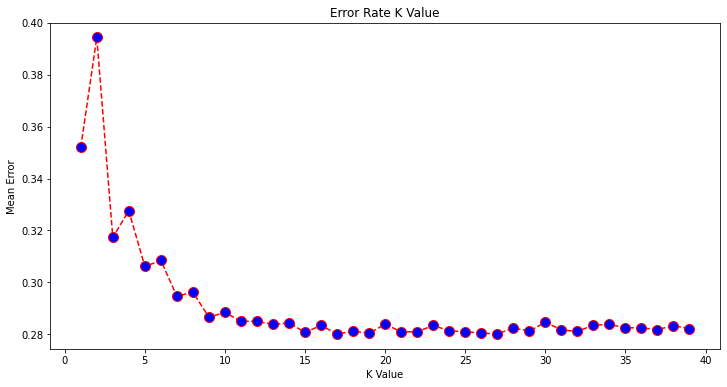

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [59]:
classifier = KNeighborsClassifier(n_neighbors=7)
y_train=y_train.astype(int)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [60]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    print(correct_predictions)
    return accuracy

print(compute_accuracy(y_test, y_pred))

5783
0.7053299182827174


In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1533   75 1213]
 [  92  191  340]
 [ 511  185 4059]]
              precision    recall  f1-score   support

           0       0.72      0.54      0.62      2821
           1       0.42      0.31      0.36       623
           2       0.72      0.85      0.78      4755

    accuracy                           0.71      8199
   macro avg       0.62      0.57      0.59      8199
weighted avg       0.70      0.71      0.69      8199



In [63]:
knn.score(X_test, y_test)

0.7177704598121722